# K Nearest Neighbor Classifier

In [63]:
import pandas as pd
from sklearn.datasets import load_digits

In [64]:
digits = load_digits()

In [65]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [66]:
digits.data[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [67]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [69]:
len(X_train)

1347

In [70]:
#Using for loop to find the best k value
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for k in range(1,101):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))

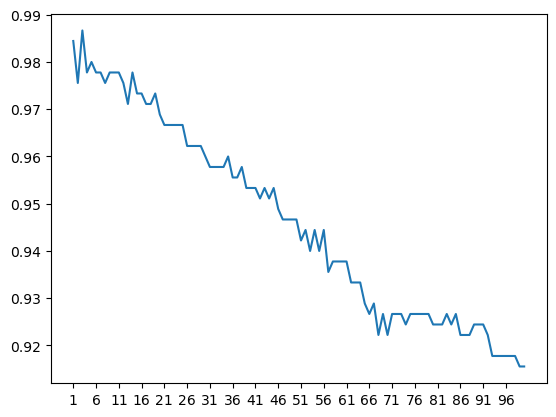

In [71]:
#plotting the accuracy against k values for the range 1 - 101
plt.plot(range(1,101), accuracy)
plt.xticks(range(1,101, 5))
plt.show()

In [72]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
model.score(X_test, y_test)

0.9866666666666667

In [74]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 48,  1],
       [ 0,  1,  0,  1,  1,  0,  0,  0,  0, 43]])

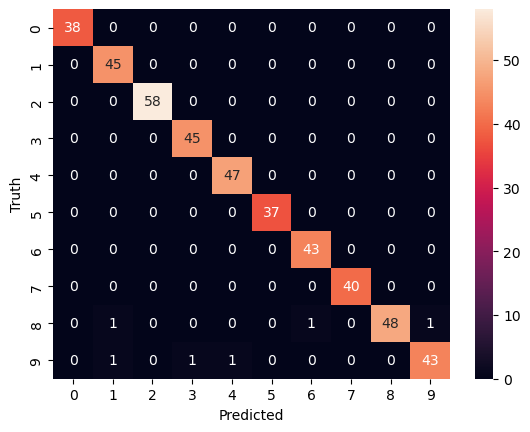

In [75]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        58
           3       0.98      1.00      0.99        45
           4       0.98      1.00      0.99        47
           5       1.00      1.00      1.00        37
           6       0.98      1.00      0.99        43
           7       1.00      1.00      1.00        40
           8       1.00      0.94      0.97        51
           9       0.98      0.93      0.96        46

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

